<a target="_blank" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/026_pandas_aggregate.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(pandas-aggregated-notebook)=
# Pandas (2)

Il riepilogo dei dati in Pandas è un'attività fondamentale nell'analisi dei dati e consiste nel calcolare statistiche descrittive di un insieme di dati. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arviz as az

In [4]:
%%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Calcolo delle statistiche descrittive

Agli oggetti Pandas possono essere applicati vari metodi matematici e statistici. La maggior parte di questi rientra nella categoria della riduzione di dati o delle statistiche descrittive. Rispetto ai metodi degli array NumPy, i metodi Pandas consentono la gestione dei dati mancanti. Alcuni dei metodi disponibili per gli oggetti Pandas sono elencati di seguito.

| Method |	Description |
| --- | --- |
| count	| Number of non-NA values |
| describe	|Compute set of summary statistics|
| min, max	|Compute minimum and maximum values|
| argmin, argmax|	Compute index locations (integers) at which minimum or maximum value is obtained, respectively; not available on DataFrame objects|
| idxmin, idxmax|	Compute index labels at which minimum or maximum value is obtained, respectively|
| quantile|	Compute sample quantile ranging from 0 to 1 (default: 0.5)|
| sum	|Sum of values|
| mean	|Mean of values|
| median | Arithmetic median (50% quantile) of values|
| mad |	Mean absolute deviation from mean value|
| prod	|Product of all values|
| var	|Sample variance of values|
| std	|Sample standard deviation of values|
| skew|	Sample skewness (third moment) of values|
| kurt	|Sample kurtosis (fourth moment) of values|
| cumsum|	Cumulative sum of values|
| cummin, cummax	|Cumulative minimum or maximum of values, respectively|
| cumprod|	Cumulative product of values|
| diff	|Compute first arithmetic difference (useful for time series)|
| pct_change	|Compute percent changes|

Tali metodi possono essere applicati a tutto il DataFrame, oppure soltanto ad una o più colonne. 

Per fare un esempio, esamineremo nuovamente i dati `penguins.csv`. Come in precedenza, dopo avere caricato i dati, rimuoviamo i dati mancanti.

In [5]:
df = pd.read_csv("../data/penguins.csv")
df.dropna(inplace=True)

Usiamo il metodo `describe()` su tutto il DataFrame:

In [6]:
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


Se desideriamo solo le informazioni relative alle variabili qualitative, usiamo l'argomento `include='object'`.

In [7]:
df.describe(include="object")

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


I valori NaN indicano dati mancanti. Ad esempio, la colonna `species` contiene stringhe, quindi non esiste alcun valore per `mean`; allo stesso modo, `bill_length_mm` è una variabile numerica, quindi non vengono calcolate le statistiche riassuntive per le variabili categoriali (`unique`, `top`, `freq`).

Esaminimiamo le colonne singolarmente. Ad esempio, troviamo la media della colonna `bill_depth_mm`.

In [8]:
df["bill_depth_mm"].mean()

17.164864864864867

Per la deviazione standard usiamo il metodo `std()`. Si noti l'argomento opzionale `ddof`:

In [7]:
df["bill_length_mm"].std(ddof=1)

5.46866834264756

La cella seguente fornisce l'indice della riga nella quale la colonna `bill_length_mm` assume il suo valore massimo:

In [8]:
df["bill_length_mm"].idxmax()

185

La colonna `species` nel DataFrame `df` è una variabile a livello nominale. Elenchiamo le modalità di tale variabile.

In [9]:
df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

Il metodo `value_counts` ritorna la distribuzione di frequenza assoluta:

In [10]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Per le frequenze relative si imposta l'argomento `normalize=True`:

In [11]:
print(df["species"].value_counts(normalize=True))

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64


Consideriamo la lunghezza del becco dei pinguini suddivisa per ciascuna specie. Con l'istruzione seguente, possiamo generare gli istogrammi corrispondenti che rappresentano la distribuzione della lunghezza del becco in ciascun gruppo.

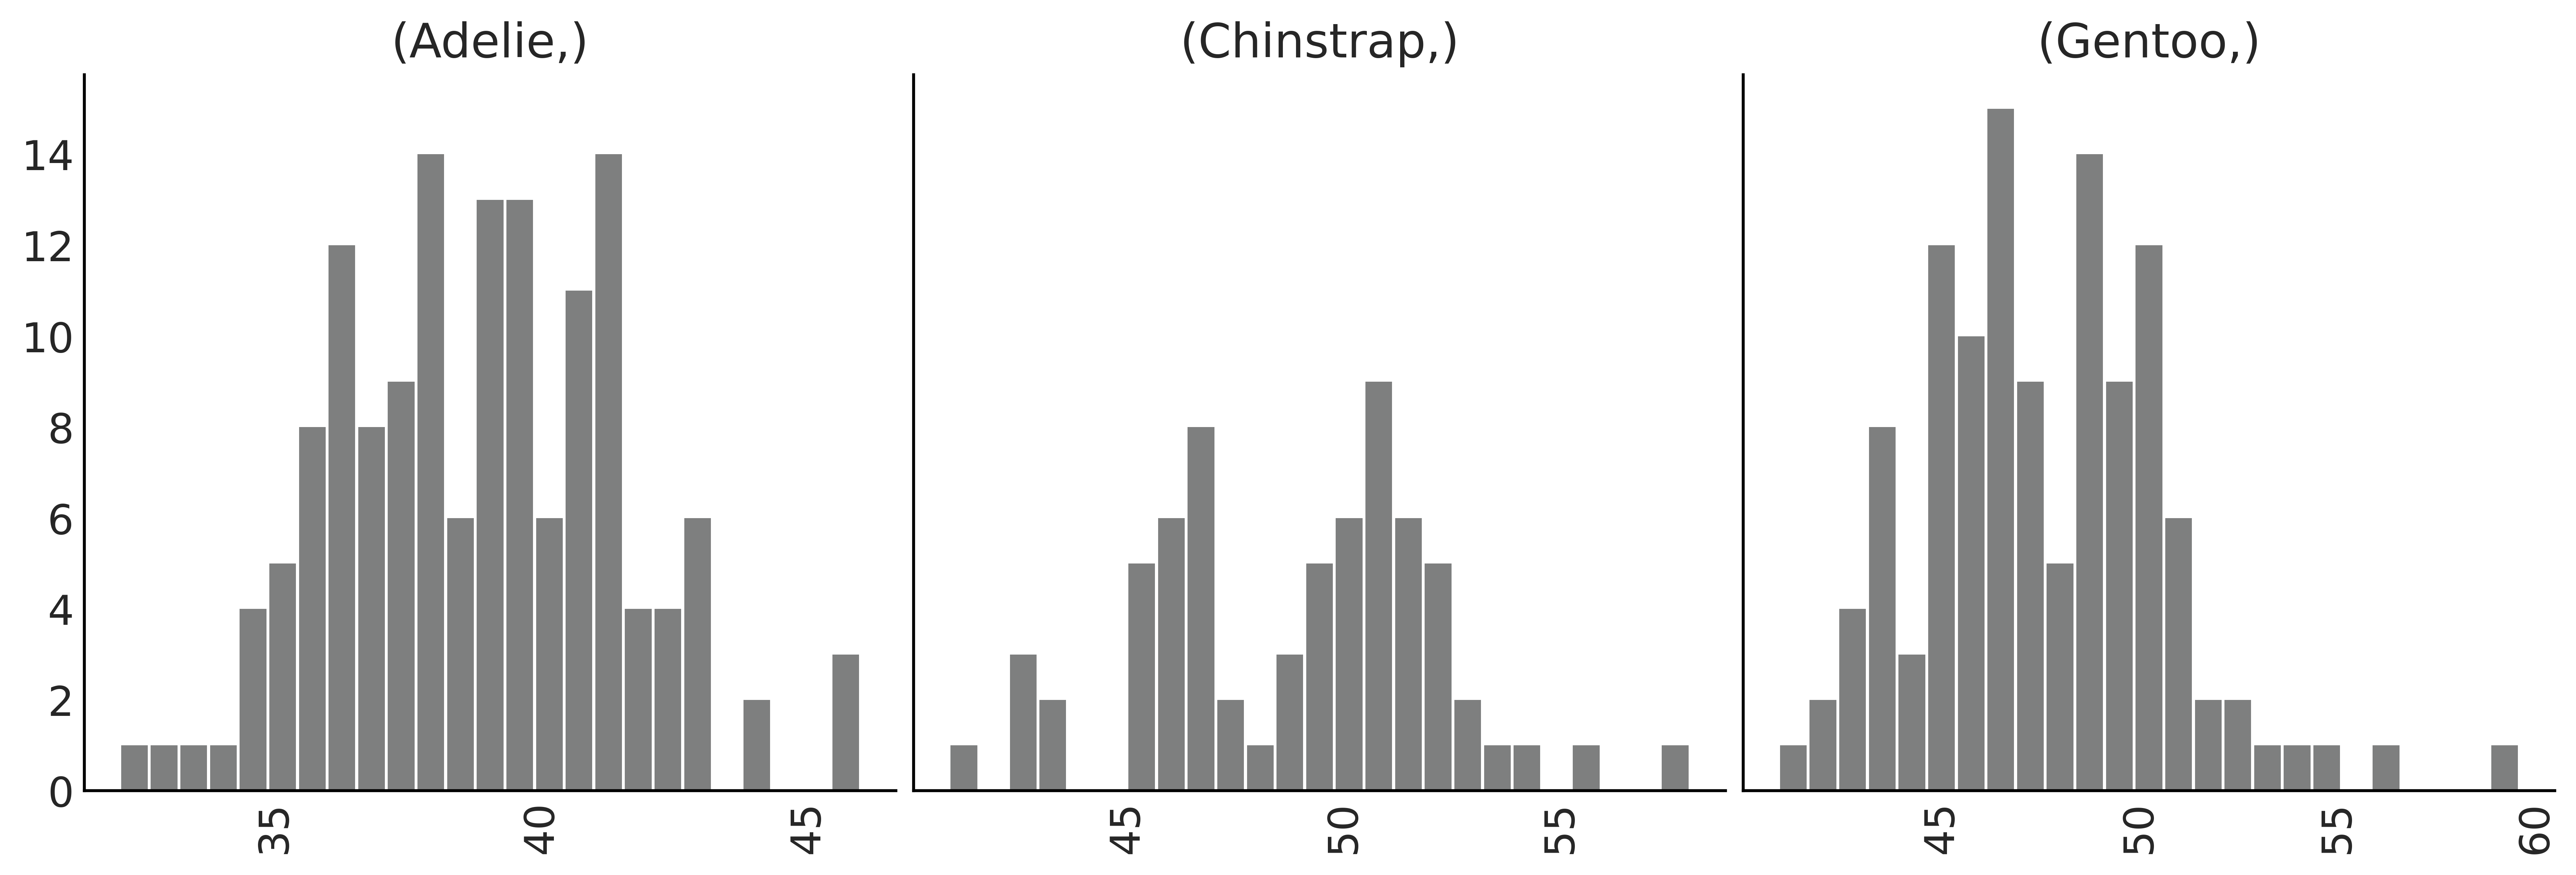

In [13]:
_ = df.hist(
    column="bill_length_mm",
    by=["species"],
    bins=25,
    color="C2",
    figsize=(12, 4),
    layout=(1, 3),
    zorder=2,
    sharey=True,
    rwidth=0.9,
)

In [23]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Aggregazione dei dati

Il riepilogo di più valori in un unico indice va sotto il nome di "aggregazione" dei dati. Il metodo `aggregate()` può essere applicato ai DataFrame e restituisce un nuovo DataFrame più breve contenente solo i valori aggregati. Il primo argomento di `aggregate()` specifica quale funzione o quali funzioni devono essere utilizzate per aggregare i dati. Molte comuni funzioni di aggregazione sono disponibili nel modulo `statistics`. Ad esempio:

- `median()`: la mediana;
- `mean()`: la media;
- `stdev()`: la deviazione standard;

Se vogliamo applicare più funzioni di aggregazione, allora possiamo raccogliere prima le funzioni in una lista e poi passare la lista ad `aggregate()`. 

In [28]:
# List of summary statistics functions
summary_stats = [np.min, np.median, np.mean, np.std, np.max]

# Calculate summary statistics for numeric columns using aggregate
result = df[
    ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
].aggregate(summary_stats)

print(result)

        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
min          32.100000      13.100000         172.000000  2700.000000
median       44.500000      17.300000         197.000000  4050.000000
mean         43.992793      17.164865         200.966967  4207.057057
std           5.468668       1.969235          14.015765   805.215802
max          59.600000      21.500000         231.000000  6300.000000


Si noti che Pandas ha applicato le funzioni di riepilogo a ogni colonna, ma, per alcune colonne, le statistiche riassuntive non si possono calcolare, ovvero tutte le colonne che contengono stringhe anziché numeri. Di conseguenza, vediamo che alcuni dei risultati per tali colonne sono contrassegnati con "NaN". Questa è un'abbreviazione di "Not a Number", talvolta utilizzata nell'analisi dei dati per rappresentare valori mancanti o non definiti.

Molto spesso vogliamo calcolare le statistiche descrittive separatamente per ciascun gruppo di osservazioni -- per esempio, nel caso presente, potremmo volere distinguere le statistiche descrittive in base alla specie dei pinguini. Questo risultato si ottiene con il metodo `.groupby()`. 

Il nome "group by" deriva da un comando nel linguaggio del database SQL, ma forse è più semplice pensarlo nei termini coniati da Hadley Wickham: split, apply, combine. Un esempio canonico di questa operazione di split-apply-combine, in cui "apply" è un'aggregazione di sommatoria, è illustrato nella figura seguente:

```{image} ../images/split_apply_combine.png
:height: 400px
:name: split_apply_combine
``` 

La figura rende chiaro ciò che si ottiene con `groupby`:

- la fase "split" prevede la suddivisione e il raggruppamento di un DataFrame in base al valore della chiave specificata;
- la fase "apply" implica il calcolo di alcune funzioni, solitamente un'aggregazione, una trasformazione o un filtro, all'interno dei singoli gruppi;
- la fase "combine" unisce i risultati di queste operazioni in una matrice di output.

Per esempio, ragruppiamo le osservazioni `body_mass_g` in funzione delle modalità della variabile `species`.

In [29]:
grouped = df["body_mass_g"].groupby(df["species"])

Calcoliamo ora la media della variabile `body_mass_g` separatamente per ciascun gruppo di osservazioni. 

In [30]:
grouped.mean()

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64

È possibile applicare criteri di classificazione multipli. Per fare un altro esempio, contiamo il numero di pinguini presenti sulle tre isole, distinguendoli per specie e genere.

In [31]:
df.groupby(["island", "species", "sex"]).size()

island     species    sex   
Biscoe     Adelie     female    22
                      male      22
           Gentoo     female    58
                      male      61
Dream      Adelie     female    27
                      male      28
           Chinstrap  female    34
                      male      34
Torgersen  Adelie     female    24
                      male      23
dtype: int64

Con il metodo `aggregate()` possiamo applicare diverse funzioni di aggregazione alle osservazioni ragruppate. Ad esempio

In [34]:
summary_stats = [np.mean, np.std]
# Group by "species" and calculate summary statistics for numeric columns
result = df.groupby("species").agg(
    {col: summary_stats for col in df.columns if pd.api.types.is_numeric_dtype(df[col])}
)

print(result)

          bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
species                                                                        
Adelie         38.823973  2.662597     18.347260  1.219338        190.102740   
Chinstrap      48.833824  3.339256     18.420588  1.135395        195.823529   
Gentoo         47.568067  3.106116     14.996639  0.985998        217.235294   

                     body_mass_g                     year            
                std         mean         std         mean       std  
species                                                              
Adelie     6.521825  3706.164384  458.620135  2008.054795  0.811816  
Chinstrap  7.131894  3733.088235  384.335081  2007.970588  0.863360  
Gentoo     6.585431  5092.436975  501.476154  2008.067227  0.789025  


Nella cella seguente troviamo la media di `body_mass_g` e `flipper_length_mm` separatamente per ciascuna isola e ciascuna specie:

In [35]:
df.groupby(["island", "species"])[["body_mass_g", "flipper_length_mm"]].mean()

body_mass_g  flipper_length_mm
island    species                                  
Biscoe    Adelie     3709.659091         188.795455
          Gentoo     5092.436975         217.235294
Dream     Adelie     3701.363636         189.927273
          Chinstrap  3733.088235         195.823529
Torgersen Adelie     3708.510638         191.531915

Facciamo la stessa cosa per la deviazione standard.

In [36]:
df.groupby(["island", "species"])[["body_mass_g", "flipper_length_mm"]].std(ddof=1)

body_mass_g  flipper_length_mm
island    species                                  
Biscoe    Adelie      487.733722           6.729247
          Gentoo      501.476154           6.585431
Dream     Adelie      448.774519           6.480325
          Chinstrap   384.335081           7.131894
Torgersen Adelie      451.846351           6.220062

Prestiamo attenzione alla seguente sintassi:

In [37]:
summary_stats = (
    df.loc[:, ["island", "species", "body_mass_g", "flipper_length_mm"]]
    .groupby(["island", "species"])
    .aggregate(["mean", "std", "count"])
)
summary_stats

body_mass_g                   flipper_length_mm  \
                            mean         std count              mean   
island    species                                                      
Biscoe    Adelie     3709.659091  487.733722    44        188.795455   
          Gentoo     5092.436975  501.476154   119        217.235294   
Dream     Adelie     3701.363636  448.774519    55        189.927273   
          Chinstrap  3733.088235  384.335081    68        195.823529   
Torgersen Adelie     3708.510638  451.846351    47        191.531915   

                                     
                          std count  
island    species                    
Biscoe    Adelie     6.729247    44  
          Gentoo     6.585431   119  
Dream     Adelie     6.480325    55  
          Chinstrap  7.131894    68  
Torgersen Adelie     6.220062    47

Nell'istruzione precedente selezioniamo tutte le righe (`:`) di tre colonne di interesse: `df.loc[:, ["island", "species", "body_mass_g", "flipper_length_mm"]]`. L'istruzione `.groupby(["island", "species"])` ragruppa le osservazioni (righe) secondo le modalità delle variabili `island` e `species`. Infine `.aggregate(["mean", "std", "count"])` applica i metodi statistici specificati a ciascun gruppo di osservazioni. Con questa sintassi la sequenza delle operazioni da eseguire diventa molto intuitiva.

È possibile approfondire questo argomento consultanto il [capitolo 10](https://wesmckinney.com/book/data-aggregation.html) del testo *Python for Data Analysis* di {cite:t}`mckinney2022python`.

## Watermark

In [15]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Sep 06 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

matplotlib: 3.7.2
scipy     : 1.11.2
arviz     : 0.16.1
numpy     : 1.25.2
pandas    : 2.1.0

Watermark: 2.4.3

